In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
data = pd.read_csv(url, index_col = 0).reset_index(drop= True)

# 데이터에 불필요한 오브젝트 컬럼이 있음을 확인
# Year, Genre, Publisher 컬럼에 누락이 있음을 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [3]:
# 데이터에 K, M 등의 단위가 적혀있음을 확인
data[data.iloc[:,-4:].sum(axis=1).str.contains('[A-Za-z]')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.00,Racing,Empire Interactive,480K,0.33M,0K,0.06
36,Advance Wars: Dual Strike,DS,2005.00,Strategy,Nintendo,0.3,0.03M,0.04,0.03
45,Resident Evil: Revelations 2,PS3,2015.00,Action,Capcom,60K,0.08,0.16,0.03
64,SD Gundam Force,GBA,2004.00,Shooter,Namco Bandai Games,0.01,0,0,0M
73,Teenage Mutant Ninja Turtles,XB,2003.00,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
...,...,...,...,...,...,...,...,...,...
16525,Planet Monsters,GBA,2001.00,Action,Titus,0.01,0K,0,0
16571,Koihime Enbu,PS4,2016.00,Fighting,Yeti,0,0M,0.02,0
16578,Gex: Enter the Gecko,PS,1998.00,Platform,BMG Interactive Entertainment,320K,0.22,0,0.04
16580,Captain Morgane and the Golden Turtle,DS,2012.00,Adventure,Reef Entertainment,0,0.03,0M,0


In [4]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.1f}".format(x)})

data['Year'].sort_values().unique()

array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
       13.0, 14.0, 15.0, 16.0, 86.0, 94.0, 95.0, 96.0, 97.0, 98.0, 1980.0,
       1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
       1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0,
       1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
       2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
       2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0, nan])

In [5]:
# 판매량 데이터의 단위가 M임을 확인한 후, 문자 M은 삭제, K는 기존 값에 1000을 나누어 주는 것으로 변환

def change_k(x):
    if x.find('K') != -1: return float(x.replace('K',''))/1000
    else : return float(x)

# 연도의 경우 조건에 따라 수정
    
def change_year(x):
    if x >= 1900 : return x
    elif x < 10 : return '200'+ str(x)
    elif x < 30 : return '20'+ str(x)
    elif x >= 30 :  return '19'+ str(x)
    else : return x

data.Year = data.Year.apply(change_year).astype('float')
        
for i in range(4):
    data.iloc[:,-(i+1)] = data.iloc[:,-(i+1)].str.replace('M','')
    data.iloc[:,-(i+1)] = data.iloc[:,-(i+1)].apply(change_k)

# 글로벌 판매량을 추가
data['Global_Sales'] = data.iloc[:,-4:].sum(axis=1)

# Publisher를 통한 비즈니스 인사이트 도출은 분석 목적에 포함되지 않아 Publisher 컬럼 삭제

data = data.drop(columns = 'Publisher')

data

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.00,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.00,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.00,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.00,Platform,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.00,Action,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.00,Sports,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.00,Action,0.05,0.05,0.25,0.03,0.38


In [6]:
# 게임 출시 연도 및 장르에 대한 완전 데이터 구축

complete_year = data[['Name','Year']].drop_duplicates().dropna()
complete_genre = data[['Name','Genre']].drop_duplicates().dropna()
complete_info = pd.merge(complete_year, complete_genre, on = 'Name', how ='outer').sort_values(['Name', 'Year']).dropna().drop_duplicates('Name')
complete_info

,Name,Year,Genre
10142,'98 Koshien,1998.00,Sports
11808,.hack//G.U. Vol.1//Rebirth,2006.00,Role-Playing
6384,.hack//G.U. Vol.2//Reminisce,2006.00,Role-Playing
8790,.hack//G.U. Vol.2//Reminisce (jp sales),2006.00,Role-Playing
10286,.hack//G.U. Vol.3//Redemption,2007.00,Role-Playing
...,...,...,...
5952,thinkSMART FAMILY!,2010.00,Misc
3470,thinkSMART: Chess for Kids,2011.00,Misc
10739,uDraw Studio,2010.00,Misc
3078,uDraw Studio: Instant Artist,2011.00,Misc


In [7]:
# new_data로 기존 데이터와 complete_data를 합친 뒤, 기존데이터에서 없는 항목에 대해 complete_data로 업데이트

new_data = pd.merge(data, complete_info, on = 'Name', how = "left")

for i in range(len(new_data)):
    if str(new_data.loc[i, 'Year_x']) == 'nan':
        new_data.loc[i, 'Year_x'] = new_data.loc[i, 'Year_y']
        
    if str(new_data.loc[i, 'Genre_x']) == 'nan':
        new_data.loc[i, 'Genre_x'] = new_data.loc[i, 'Genre_y']
    else : continue
        
new_data = new_data.drop(columns = ['Year_y', 'Genre_y'])
new_data = new_data.drop_duplicates()

new_data = new_data.rename(columns={'Year_x':'Year', 'Genre_x': 'Genre'})
new_data['Year'] = new_data['Year'].astype('float')

new_data.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.00,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.00,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.00,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,0.12,0.09,0.00,0.04,0.25


In [8]:
data.query('Name == "Majesty 2: The Fantasy Kingdom Sim"')

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,0.03,0.00,0.00,0.00,0.03
1252,Majesty 2: The Fantasy Kingdom Sim,PC,2009.00,Simulation,0.01,0.00,0.00,0.00,0.01


In [9]:
new_data.query('Name == "Majesty 2: The Fantasy Kingdom Sim"')

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
358,Majesty 2: The Fantasy Kingdom Sim,X360,2009.00,Simulation,0.03,0.00,0.00,0.00,0.03
1252,Majesty 2: The Fantasy Kingdom Sim,PC,2009.00,Simulation,0.01,0.00,0.00,0.00,0.01


In [10]:
new_data.Year.value_counts().iloc[-5:] # 2017, 2020년 데이터는 매우 저조함에 따라 outlier로 보고 삭제

1984.00    14
1985.00    14
1980.00     9
2017.00     3
2020.00     1
Name: Year, dtype: int64

In [11]:
new_data = new_data.dropna()
new_data = new_data.query('Year <= 2016').reset_index(drop=True) # nan 값 및 2017년 이상 데이터 삭제
new_data.Year = new_data.Year.astype('int')
new_data

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16412,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01,0.20
16413,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,0.01
16414,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13,0.79
16415,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03,0.38


## 데이터 결측치 변화

In [12]:
data.isnull().sum()

Name              0
Platform          0
Year            271
Genre            50
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
new_data.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# 1. 어떤 종류의 게임이 가장 많이 만들어졌을까?

In [14]:
new_data['Genre'].value_counts()

Action          3281
Sports          2331
Misc            1720
Role-Playing    1467
Shooter         1297
Adventure       1273
Racing          1233
Platform         876
Simulation       852
Fighting         841
Strategy         675
Puzzle           571
Name: Genre, dtype: int64

In [15]:
new_data['Genre'].value_counts(True) *100

Action         19.99
Sports         14.20
Misc           10.48
Role-Playing    8.94
Shooter         7.90
Adventure       7.75
Racing          7.51
Platform        5.34
Simulation      5.19
Fighting        5.12
Strategy        4.11
Puzzle          3.48
Name: Genre, dtype: float64

In [16]:
genre = new_data.drop_duplicates('Name').groupby(['Genre']).size()
genre.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

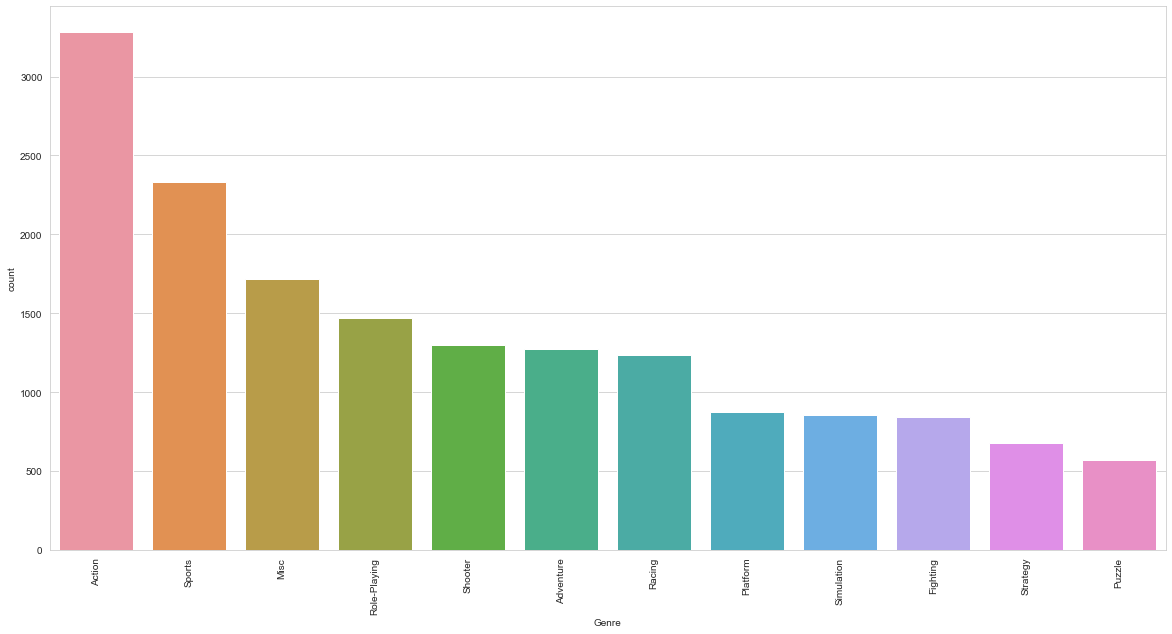

In [17]:
plt.figure(figsize=(20, 10))
g = sns.countplot(x="Genre", data=new_data, order = new_data['Genre'].value_counts().index)
plt.xticks(rotation=90)

* 액션게임의 경우 3,281개로 전체의 19.9%로 가장 높게 나타났으며, 스포츠게임 2331(14.2%)이 두번째로 높게 나타났음

# 2. 몇 년도에 가장 많은 게임이 출시 되었는가?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012')])

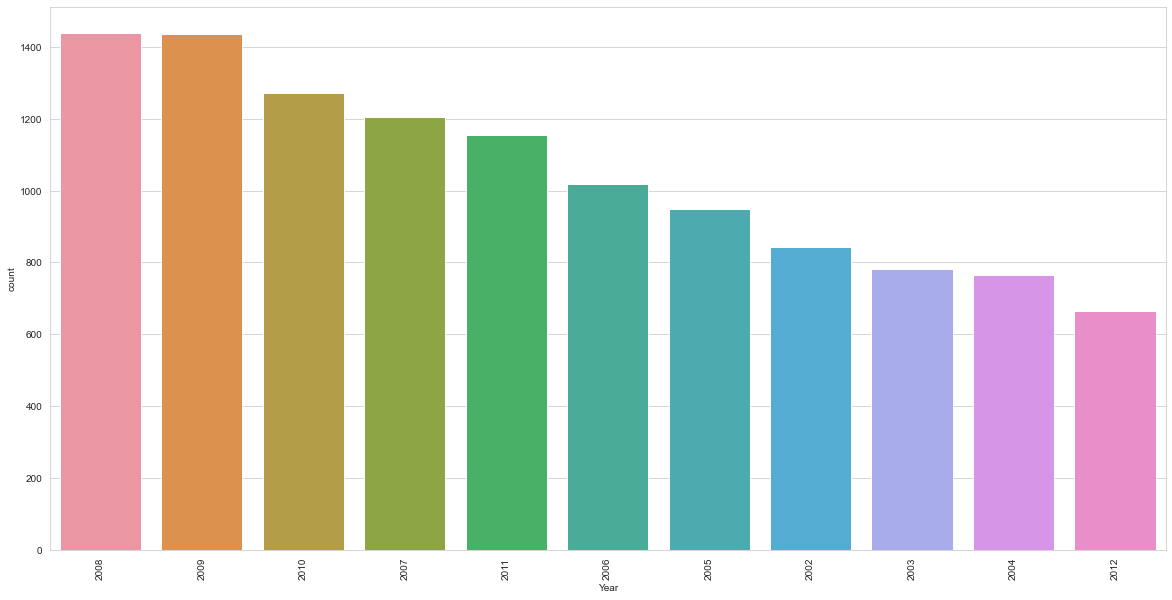

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=new_data, order = new_data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index[:11])
plt.xticks(rotation=90)

In [19]:
new_data['Year'].value_counts().head(10)

2008    1439
2009    1434
2010    1271
2007    1203
2011    1155
2006    1017
2005     948
2002     843
2003     782
2004     765
Name: Year, dtype: int64

### 분석결과
1. 2009  ->  1439
1. 2008  ->  1434
1. 2010  ->  1271
1. 2007  ->  1203
1. 2011  ->  1155

* 2006년 부터 2011년까지 6년 동안 연간 비디오게임 출시량은 1,000건 이상으로 나타남
* 따라서 이 기간은 비디오 게임의 전성기라고 볼 수 있음

# 3. 장르별 게임 출시량(최근 5년) 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016')])

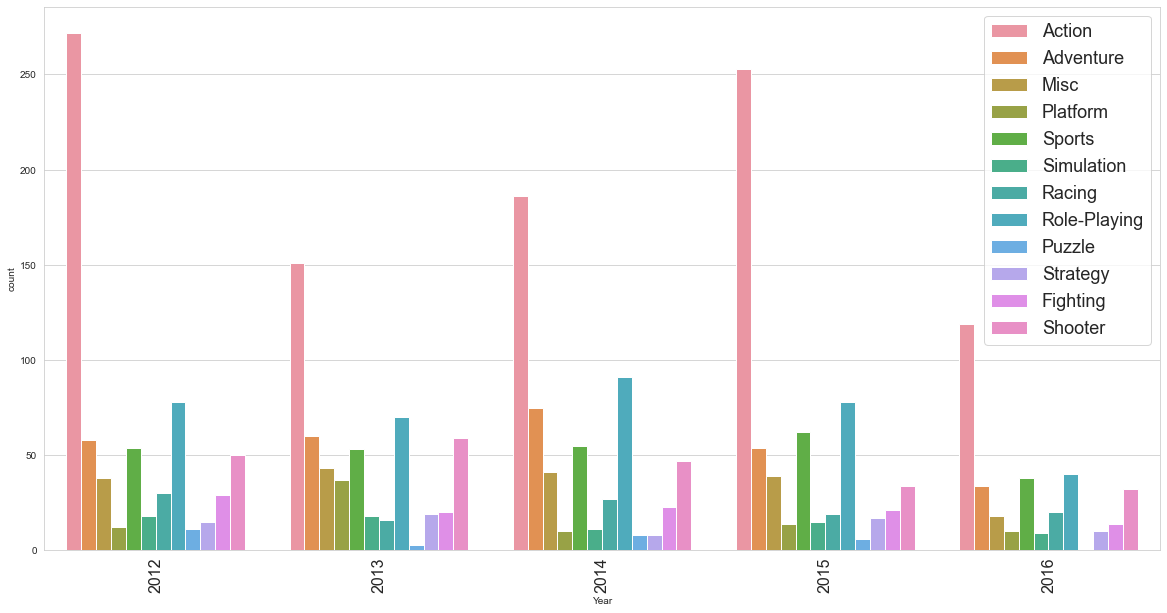

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=new_data, hue='Genre', order=new_data.Year.value_counts().sort_index().iloc[-5:].index)
plt.legend(loc = 1 , fontsize=18)
plt.xticks(size=16, rotation=90)

# 4. 몇년도의 판매량이 가장 높을까?

In [21]:
data_year = new_data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)

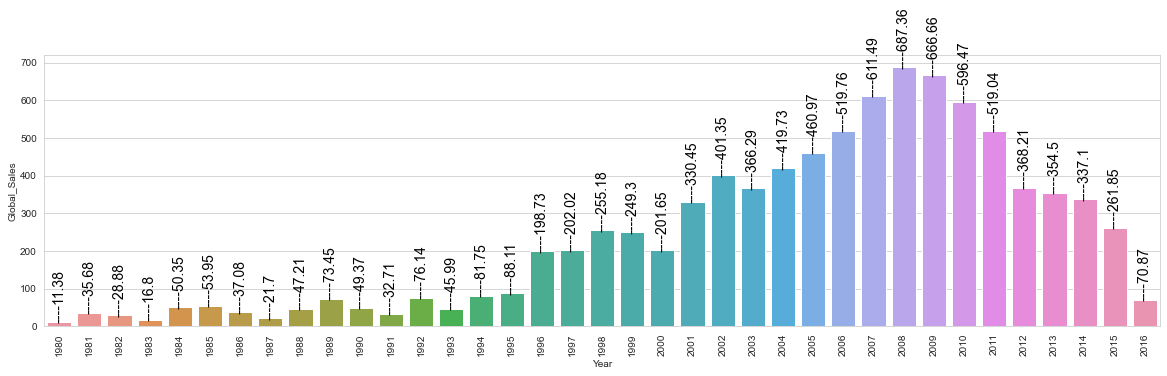

In [22]:
plt.figure(figsize=(20, 5))
g = sns.barplot(x="Year", y="Global_Sales", data=data_year)

index = 0
for value in data_year['Global_Sales'].values:
#     print(asd)
    g.text(index, value + 5, str('----' +str(np.round(value,2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

### Answer is =>
1. 2008 	687.36
1. 2009 	666.66
1. 2007 	611.49
1. 2010 	596.47
1. 2006 	519.76

# 5. 1년 동안 어떤 장르의 게임이 가장 많이 등장했나?

In [23]:
year_max_df = new_data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_genre

In [24]:
genre = year_max_genre['Genre'].values
# genre[0]

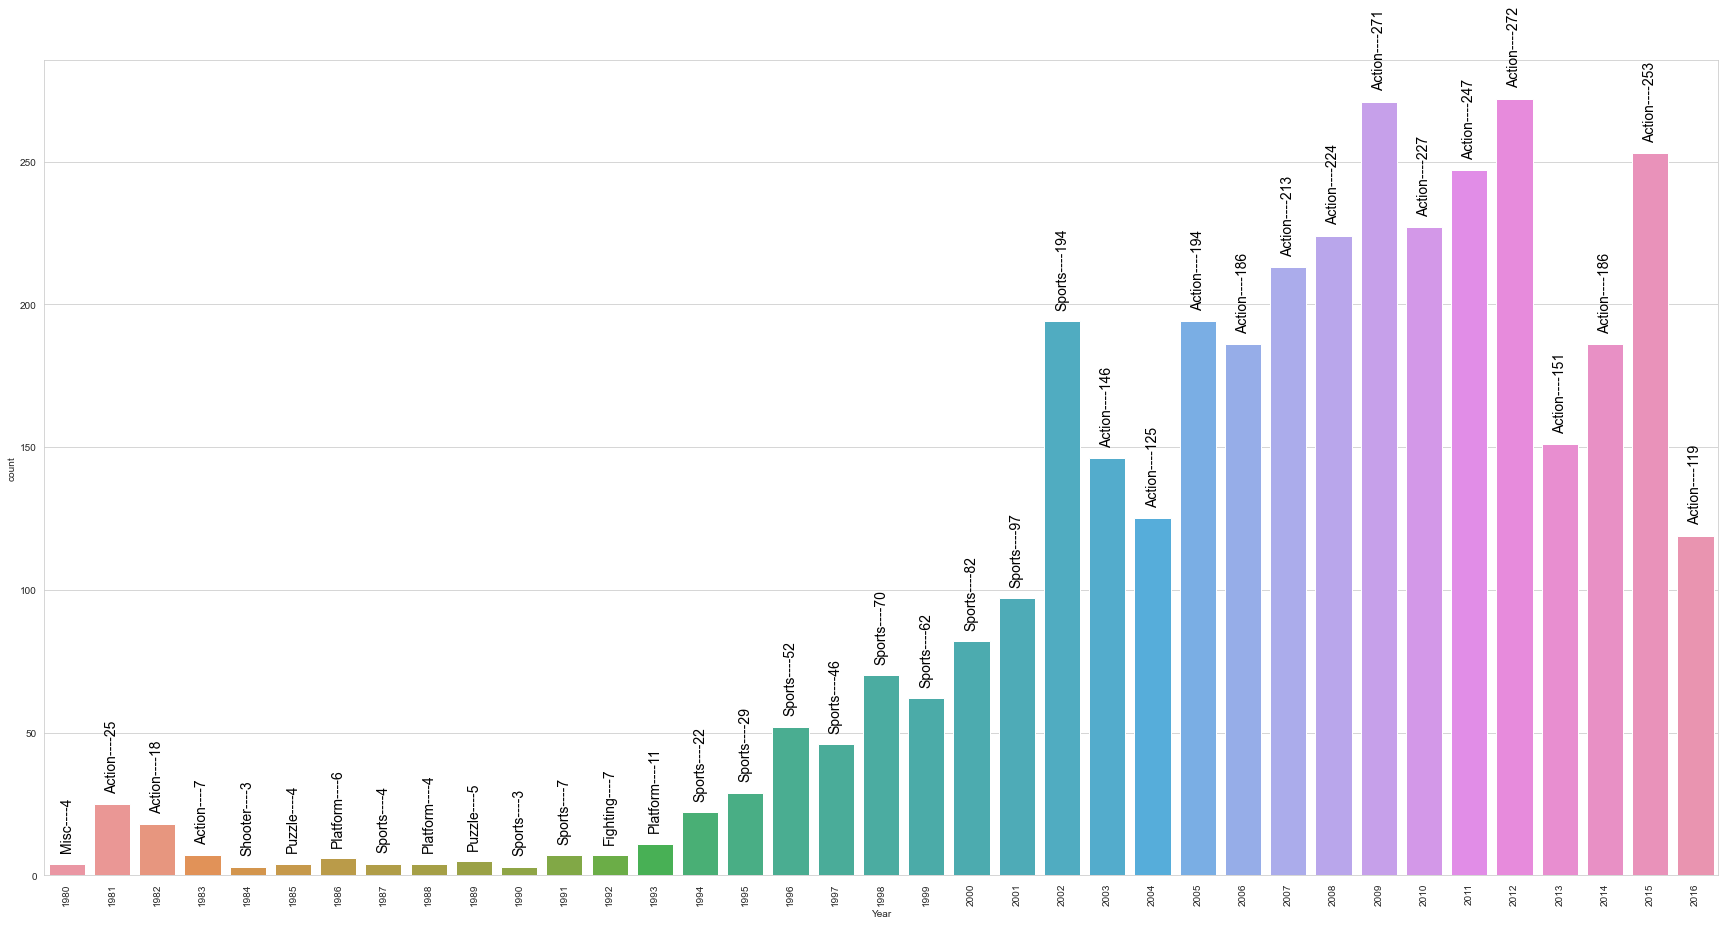

In [25]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 6. 1년 동안 어떤 장르의 게임이 가장 많이 팔렸나?

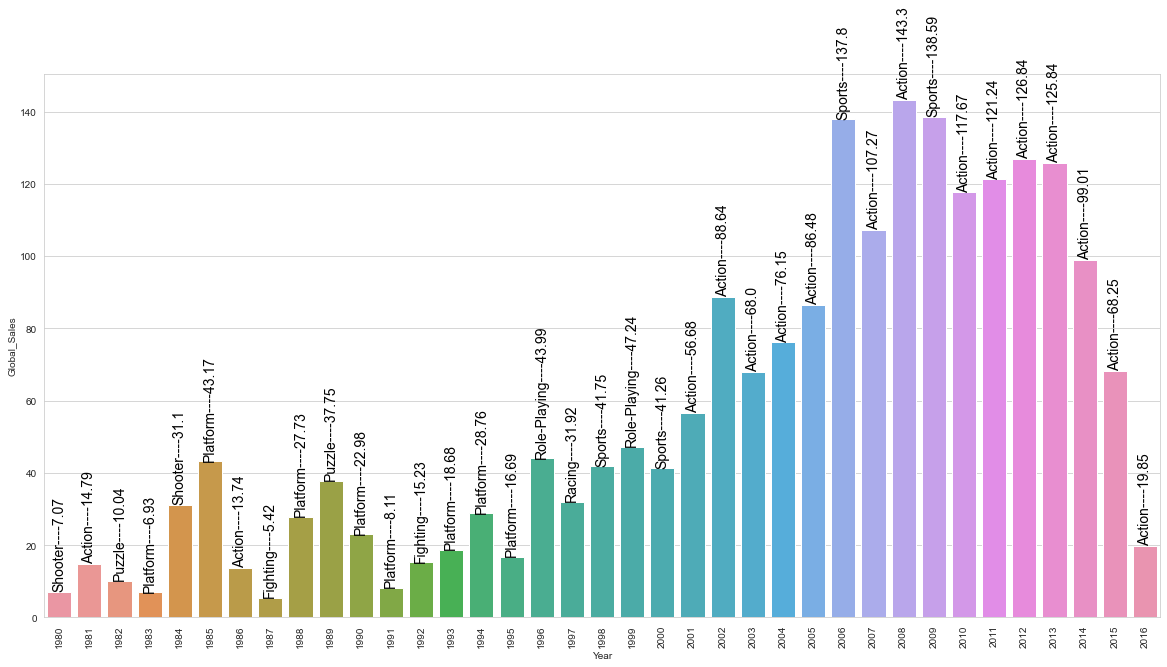

In [26]:
year_sale_dx = new_data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max

genre = year_sale_max['Genre']

plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 7. 지금까지 어떤 장르의 게임이 가장 많이 팔렸는가?

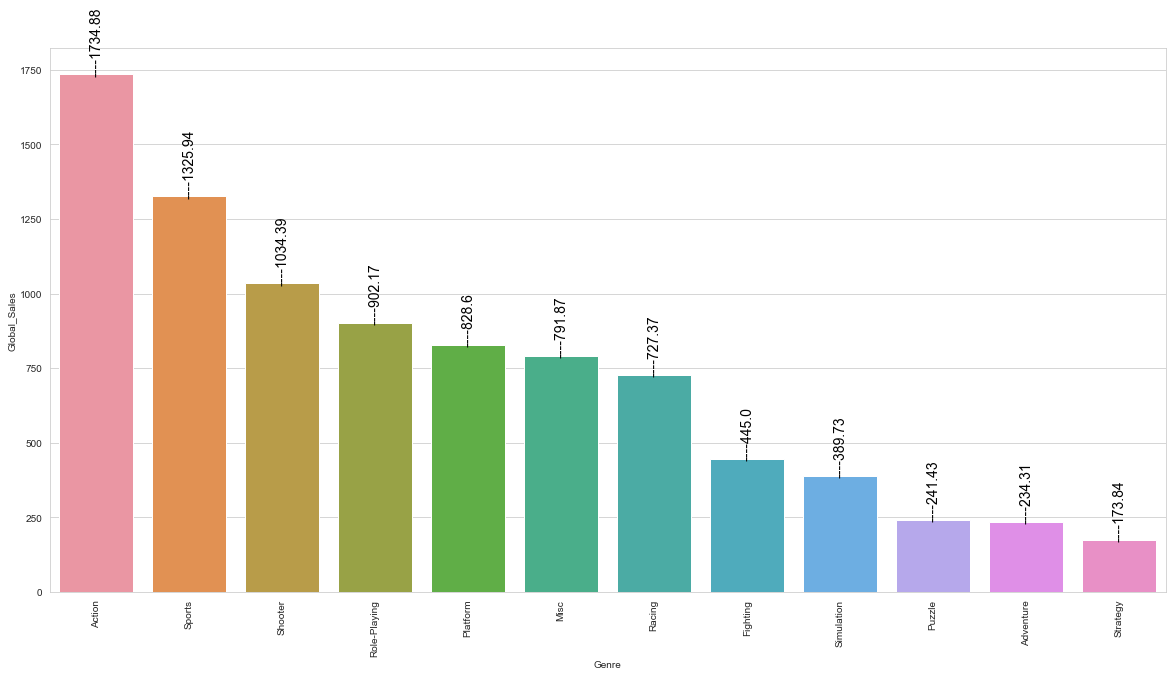

In [27]:
data_genre = new_data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

plt.figure(figsize=(20, 10))
g = sns.barplot(x="Genre", y="Global_Sales", data=data_genre)


index = 0
for value in data_genre['Global_Sales'].values:
#     print(asd)
    g.text(index, value + 5, str('----' +str(np.round(value,2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=90)

plt.show()

* Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5

# 8. 단일 게임 중에서는 어떤 게임이 가장 많이 팔렸는가?

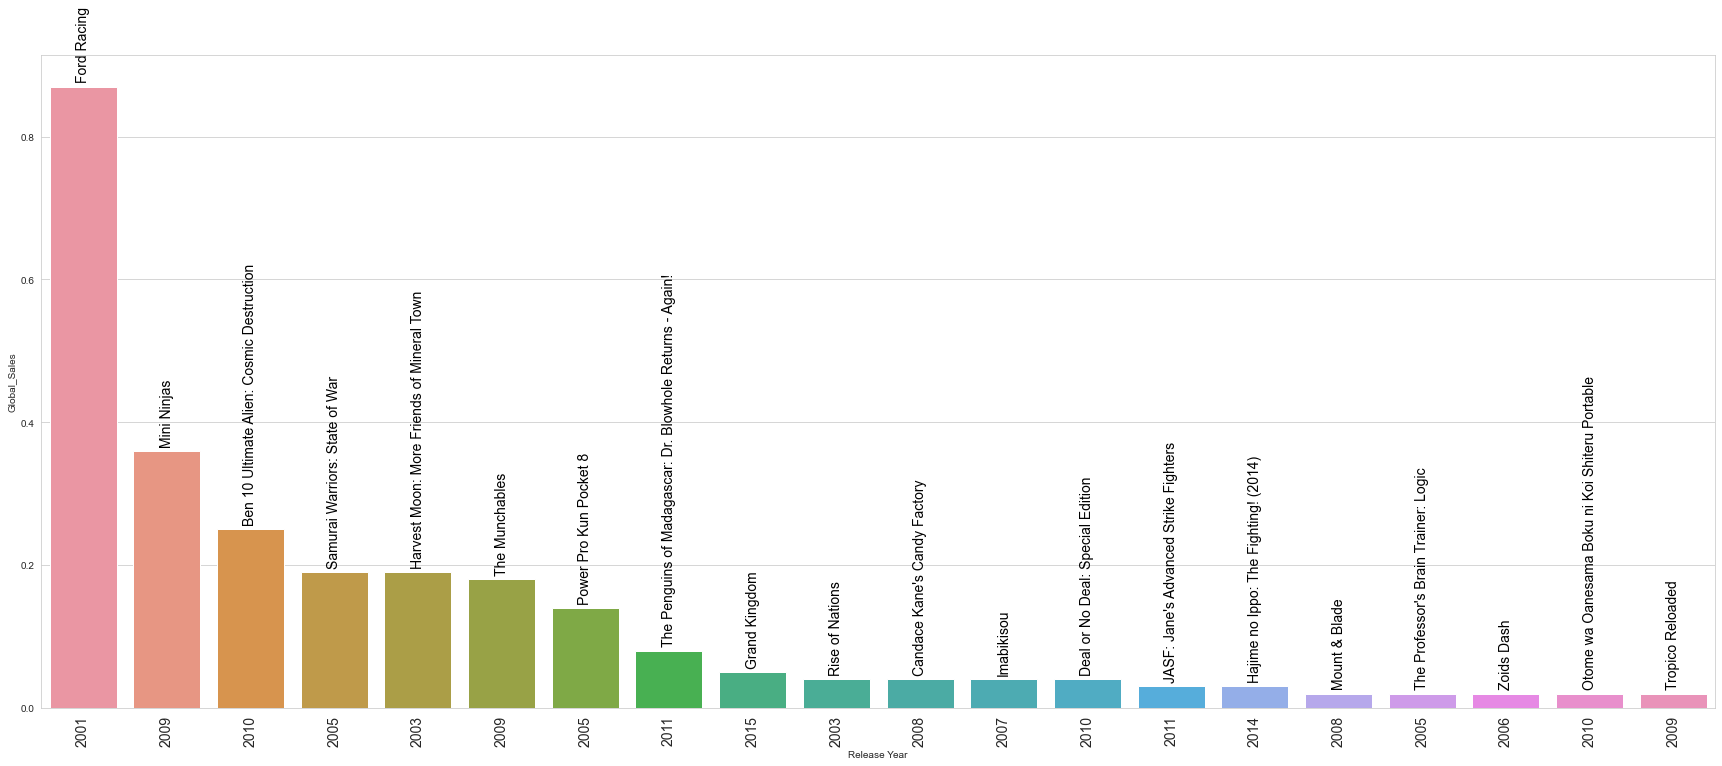

In [28]:
variable = 'Global_Sales'
top_game_sale = new_data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', variable]]
top_game_sale = top_game_sale.sort_values(by=[variable], ascending=False)
# top_game_sale

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 12))
g = sns.barplot(x='Name', y=variable, data=top_game_sale)
name = top_game_sale['Name'].reset_index(drop=True)

index = 0
for value in top_game_sale[variable].reset_index(drop=True):
    g.text(index, value + 0.01, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

# 9. 장르별, 지역별 판매량 비교

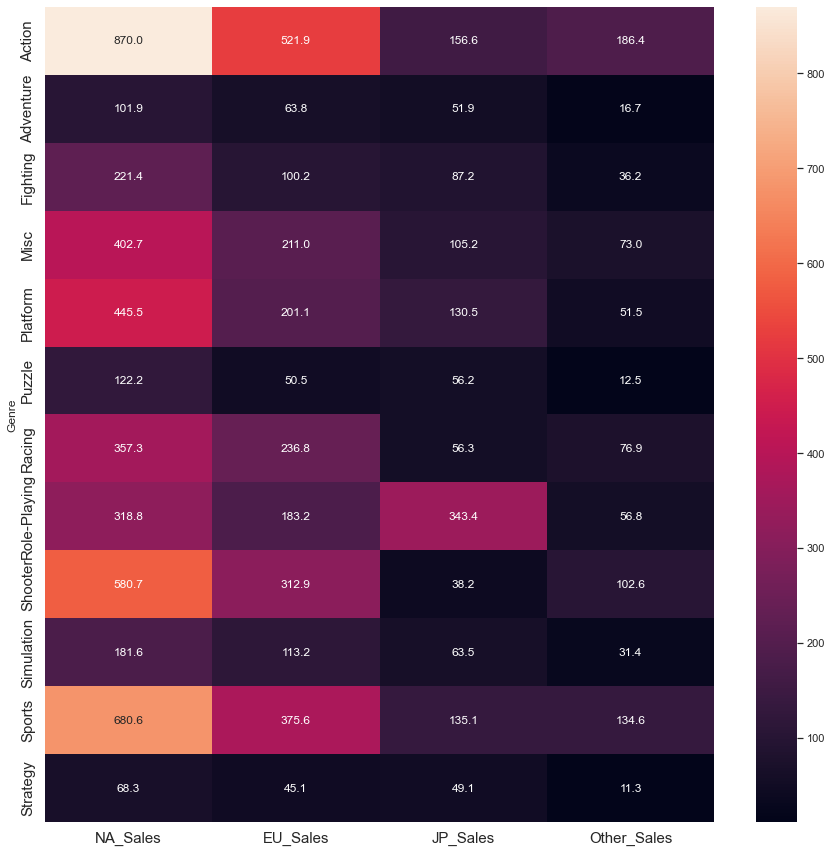

In [29]:
comp_genre = new_data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

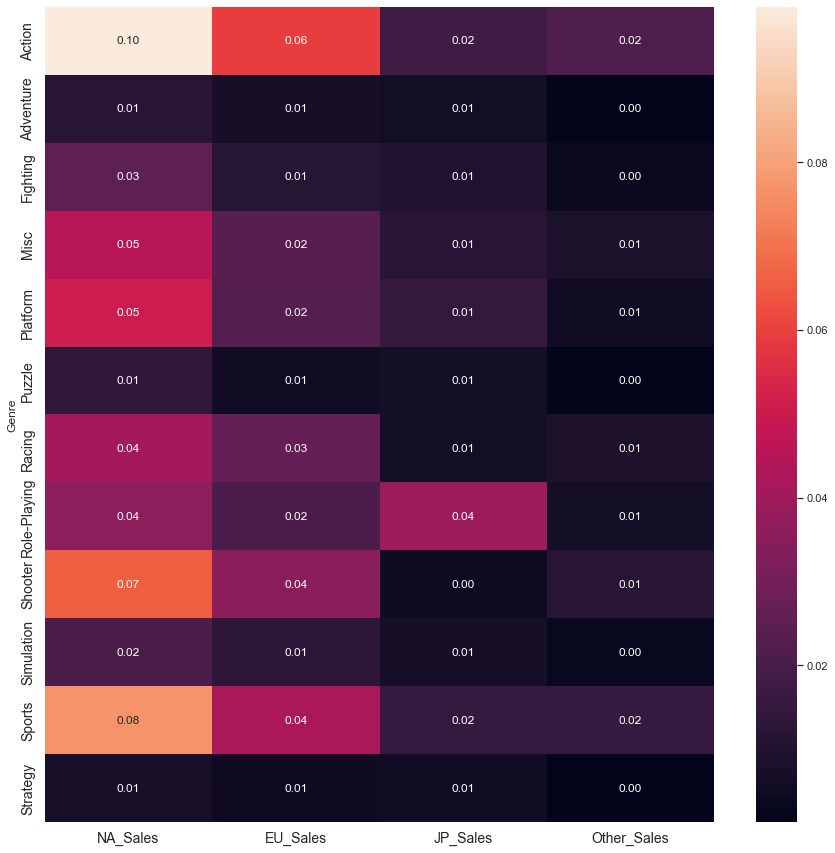

In [30]:
comp_map = comp_genre.groupby(by=['Genre']).sum() /comp_genre.groupby(by=['Genre']).sum().sum().sum()

plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.2f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 10. 지역별 판매량

In [31]:
top_sale_reg = new_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4350.97
1,EU_Sales,2415.37
2,JP_Sales,1273.35
3,Other_Sales,789.84


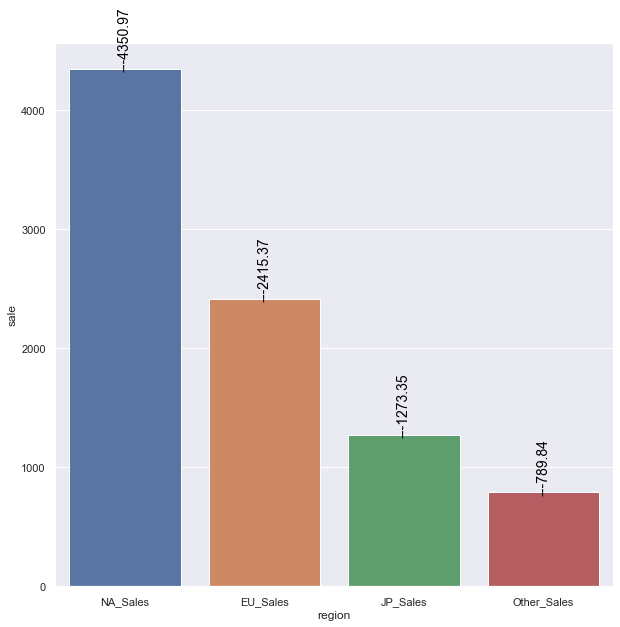

In [32]:
plt.figure(figsize=(10, 10))
g = sns.barplot(x='region', y='sale', data = top_sale_reg)

sale = top_sale_reg['sale'].reset_index(drop=True)

index = 0
for value in top_sale_reg['sale'].reset_index(drop=True):
    g.text(index, value + 5, str('---' + str(np.round(sale[index], 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

In [33]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x22bc8d7ba30>,
 [Text(-1.0997166378706047, 0.024966305104553412, 'NA_Sales'),
  Text(0.7997463544136559, -0.7552521225405906, 'EU_Sales'),
  Text(0.9344999178909883, 0.5802670966561316, 'JP_Sales'),
  Text(0.30507906600915563, 1.0568475592454105, 'Other_Sales')],
 [Text(-0.5998454388385116, 0.013617984602483677, '49.3%'),
  Text(0.43622528422563045, -0.41195570320395847, '27.4%'),
  Text(0.509727227940539, 0.316509325448799, '14.4%'),
  Text(0.16640676327772122, 0.576462305042951, '8.9%')])

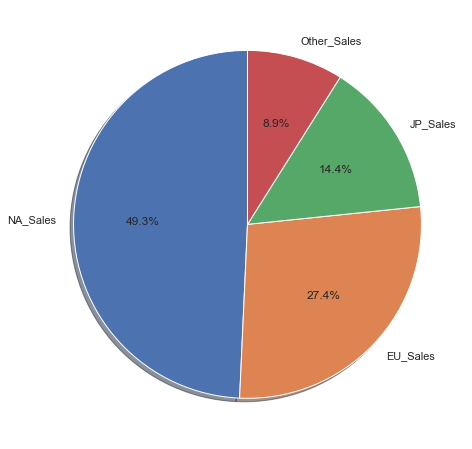

In [34]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

* 북미시장이 비디오게임 시장의 거의 50%를 점하고 있는 상황 

# 11. 상관관계 분석

## heatmap

* 상관관계 분석 결과 전반적인 시장 트렌드는 북미 시장과 유럽시장이 주도하는 것으로 나타남
* 이에 따라 주요 북미 시장과 유럽시장을 타겟으로 게임을 개발 계획을 잡는 것이 효과적일 것으로 판단 됨

<AxesSubplot:>

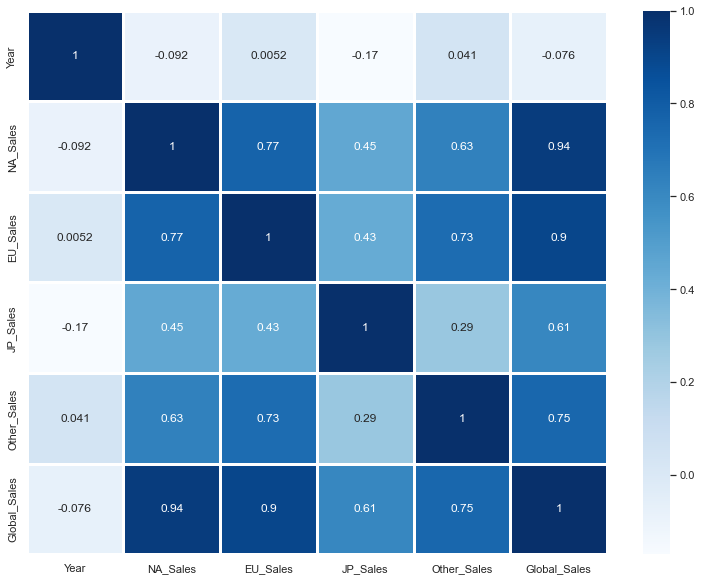

In [35]:
plt.figure(figsize=(13,10))
sns.heatmap(new_data.corr(), cmap = "Blues", annot=True, linewidth=3)

In [36]:
obs = new_data.groupby(['Genre']).sum().iloc[:,1:-1]

In [37]:
chiresult = stats.chi2_contingency(obs, correction=False)

print('Chi square: {}'.format(chiresult[0]))
print('P-value:', np.round(chiresult[1],3))

# 위 가설검정을 토대로 p-value가 0.00로 나타남에 따라, 귀무가설을 기각하고 대립가설을 채택함
#  따라서 지역에 따른 장르별 출고량은 균일하게 분포되어있지 않음
# => 지역에 따라 선호하는 게임의 장르가 다름

Chi square: 694.7382953167757
P-value: 0.0


In [38]:
obs = new_data.groupby(['Year', 'Genre']).sum().iloc[:,-1].unstack().fillna(0).iloc[-5:] 
chiresult = stats.chi2_contingency(obs, correction=False)

print('Chi square: {}'.format(chiresult[0]))
print('P-value:', np.round(chiresult[1],3))

# 위 가설검정을 토대로 p-value가 0.00로 나타남에 따라, 귀무가설을 기각하고 대립가설을 채택함
#  따라서 연도별 따른 장르별 출고량은 균일하게 분포되어있지 않음
# => 기간별로 선호하는 게임의 장르가 다름
# => 기간별 선호 트렌드가 존재함

Chi square: 63.832748330132354
P-value: 0.027
